In [72]:
%run /u/cmor/jupyter/HP_project/main.ipynb
def convergence_fitter(plot='real'):

    global scan, t0, tf # Get all this stuff needed
    
    all_a = []
    all_b = []
    all_c = []
    all_d = []
    all_e = []
    all_m = []
    all_g = []
    all_k = []
    all_x = []
    all_r = []
    
    ke = len(scan)
    
    if plot != None:
        plt.figure()
        plt.xlabel('Time units $(a/\\rho_{ti})$')
        plt.ylabel('Zonal Potential $(\\frac{\langle\phi_{zf}(t)\\rangle}{\langle\phi_{zf}(0)\\rangle})$')
        plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero
            
    ## Guesses:

    ## LHD_surf_0026
    a = 0.05126107
    b = 0.13020194
    c = 0.01299829
    d = 9.83095429
    e = 0.03139539
    g = 3.11837672
    k = 0.01949793
    m = 0.76578451

    for n in reversed(range(0, ke)):

        y, t = data_grab(t0, tf, n)

        gmodel = lmfit.Model(edi_2)
        if n == ke-1:
            pars = Parameters()
            pars.add('a', value=a)  # Residual
            pars.add('b', value=b)
            pars.add('c', value=c)
            pars.add('d', value=d)
            pars.add('e', value=e)  # decay
            pars.add('g', value=g)
            pars.add('k', value=k)
            pars.add('m', value=m)
        else:
            pars = Parameters()
            pars.add('a', value=all_a[-1])  # , min=0.0005, max=0.035)  # Residual
            pars.add('b', value=all_b[-1])
            pars.add('c', value=all_c[-1])
            pars.add('d', value=all_d[-1])
            pars.add('e', value=all_e[-1])  # decay
            pars.add('g', value=all_g[-1])
            pars.add('k', value=all_k[-1])
            pars.add('m', value=all_m[-1])

        result = gmodel.fit(y, pars, t=t, nan_policy='propagate')

        all_a = np.append(all_a, result.best_values.get("a"))
        all_b = np.append(all_b, result.best_values.get("b"))
        all_c = np.append(all_c, result.best_values.get("c"))
        all_d = np.append(all_d, result.best_values.get("d"))
        all_e = np.append(all_e, result.best_values.get("e"))
        all_m = np.append(all_m, result.best_values.get("m"))
        all_g = np.append(all_g, result.best_values.get("g"))
        all_k = np.append(all_k, result.best_values.get("k"))
        all_x = np.append(all_x, result.chisqr)
        all_r = np.append(all_r, 1 - result.residual.var() / np.var(y))

        if plot != None:
            plt.plot(t, result.init_fit, label=r"Initial guess")
#             plt.plot(t, result.best_fit, 'r--', linewidth=1, label=r"Best fit", alpha=0.5)
            plt.plot(t, y, label='{0}'.format(scan[n]))
    if plot != None:
#         plt.yscale('log')
        plt.show()
    
    all_a = np.flip(all_a)
    all_b = np.flip(all_b)
    all_c = np.flip(all_c)
    all_d = np.flip(all_d)
    all_e = np.flip(all_e)
    all_m = np.flip(all_m)
    all_g = np.flip(all_g)
    all_k = np.flip(all_k)
    all_x = np.flip(all_x)
    all_r = np.flip(all_r)

    return all_x, all_r, all_a, all_e

In [73]:
%cd /u/cmor/jupyter/HP_project/data/LHD/convergence/nv0_surface
t0 = 0
tf = 2000
scan = 18, 36, 108, 144, 180, 216, 252  # nv0
all_x, all_r, all_a, all_e = convergence_fitter(plot=None)
scan_v = scan
res_v = all_a

/raven/u/cmor/jupyter/HP_project/data/LHD/convergence/nv0_surface


In [74]:
%cd /u/cmor/jupyter/HP_project/data/LHD/convergence/nw0_surface
t0 = 0
tf = 2000
scan = 7, 14, 28, 42  # nv0
all_x, all_r, all_a, all_e = convergence_fitter(plot=None)
scan_w = scan
res_w = all_a

/raven/u/cmor/jupyter/HP_project/data/LHD/convergence/nw0_surface


In [75]:
%cd /u/cmor/jupyter/HP_project/data/LHD/convergence/n0_global_surface
t0 = 0
tf = 2000
scan = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
all_x, all_r, all_a, all_e = convergence_fitter(plot=None)
scan_gl = scan
res_gl = all_a

/raven/u/cmor/jupyter/HP_project/data/LHD/convergence/n0_global_surface


In [76]:
%cd /u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_z_surface
t0 = 0
tf = 2000
scan = np.linspace(0.001, 1.5, 75)
all_x, all_r, all_a, all_e = convergence_fitter(plot=None)
scan_hz = scan
res_hz = all_a

/raven/u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_z_surface


In [77]:
%cd /u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_z_surface_2
t0 = 0
tf = 2000
scan = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 
        0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.020]
all_x, all_r, all_a, all_e = convergence_fitter(plot=None)
scan_hz2 = scan
res_hz2 = all_a

/raven/u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_z_surface_2


In [78]:
%cd /u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_v_surface
t0 = 0
tf = 2000
scan = np.linspace(0.001, 1.5, 38)
all_x, all_r, all_a, all_e = convergence_fitter(plot=None)
scan_hv = scan
res_hv = all_a

/raven/u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_v_surface


In [79]:
%cd /u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_v_surface_2
t0 = 0
tf = 2000
scan = [0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012, 0.00014, 
        0.00016, 0.00018, 0.00020, 0.00022, 0.00024, 0.00026, 0.00028, 
        0.00030, 0.00032, 0.00034, 0.00036, 0.00038, 0.00040]
all_x, all_r, all_a, all_e = convergence_fitter(plot=None)
scan_hv2 = scan
res_hv2 = all_a

/raven/u/cmor/jupyter/HP_project/data/LHD/convergence/hyp_v_surface_2


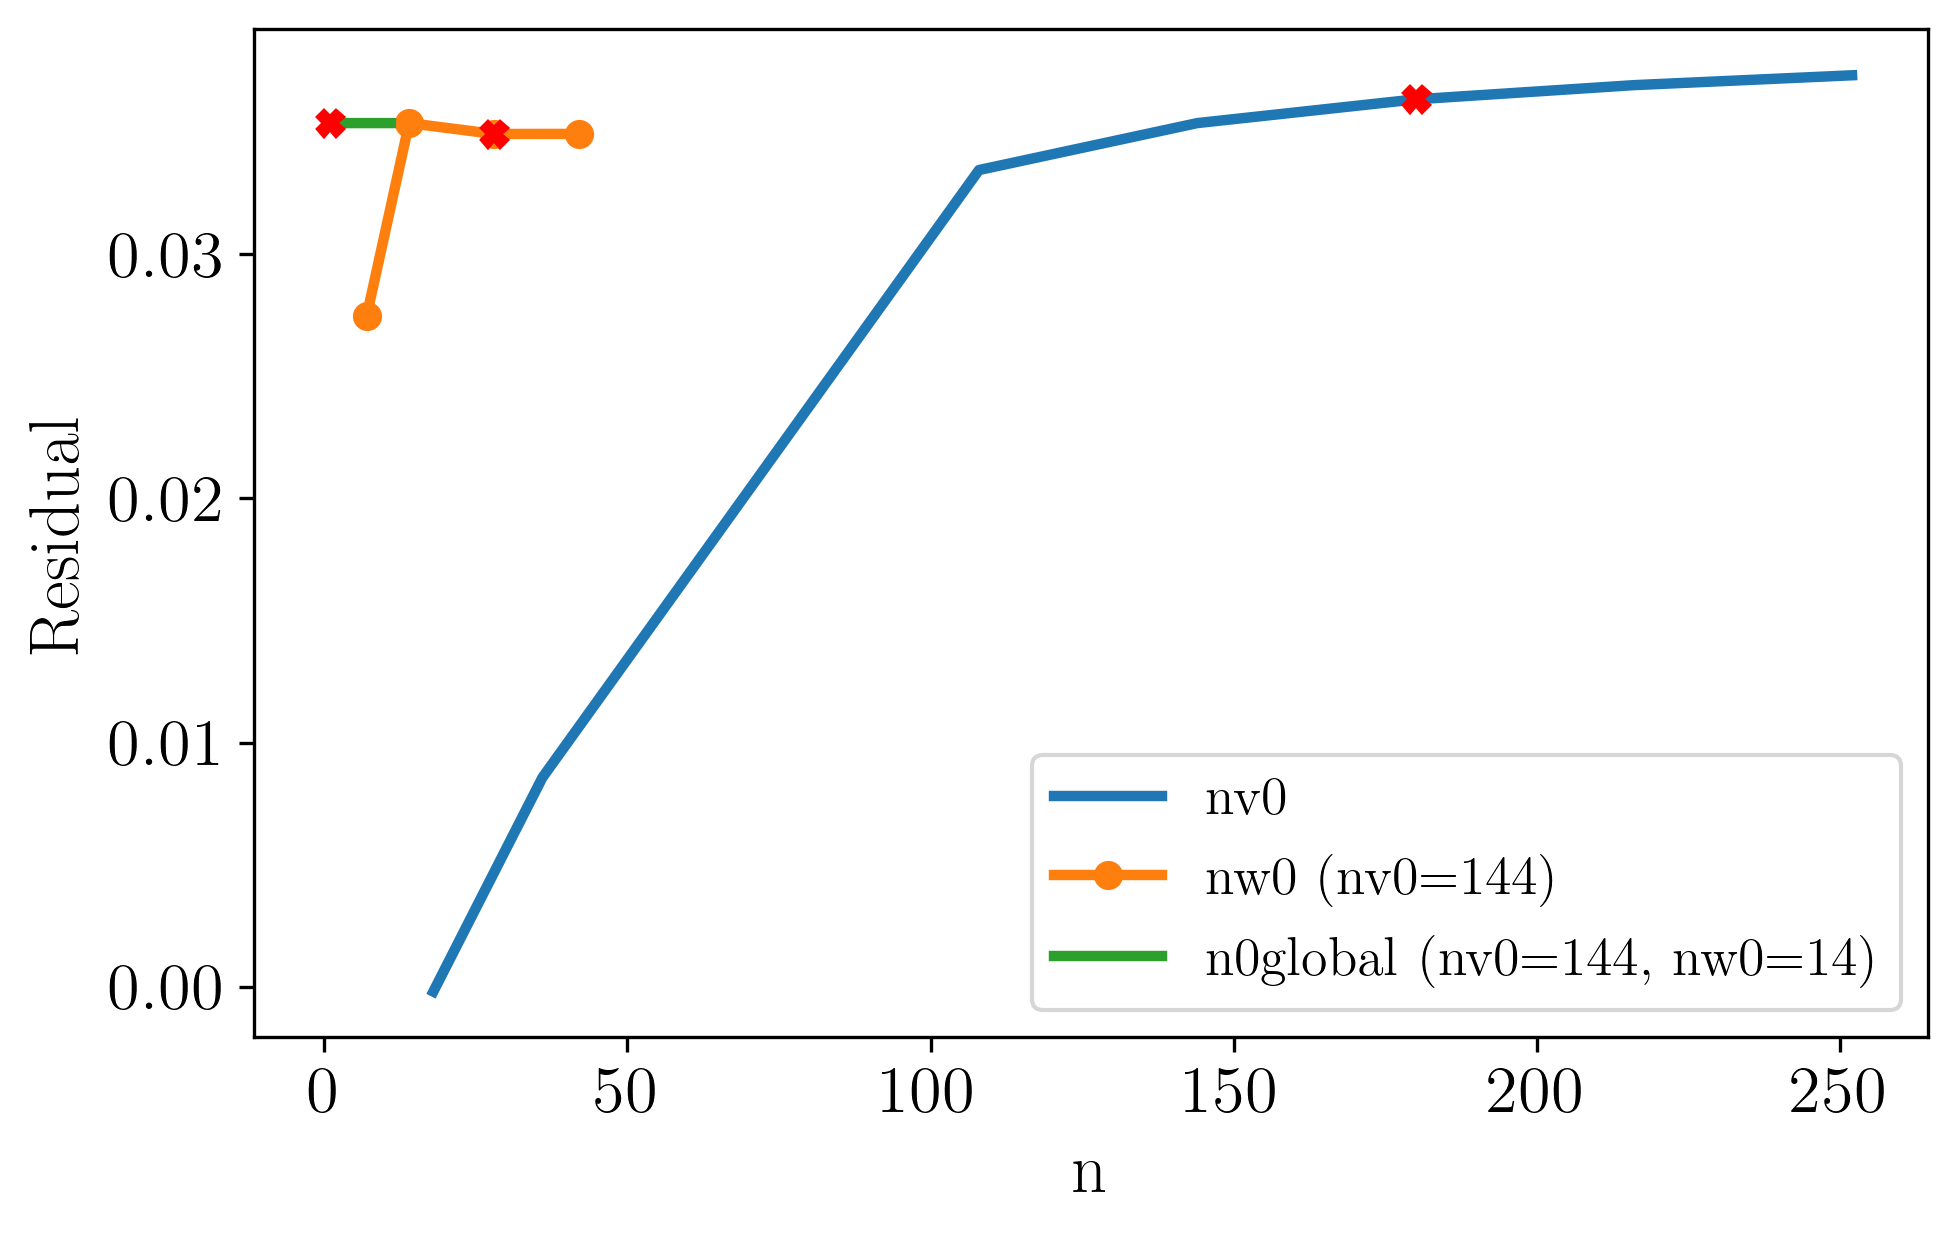

In [80]:
plt.figure()
plt.plot(scan_v, res_v, label=r"nv0")
plt.plot(scan_v[4], res_v[4], 'rX')
plt.plot(scan_w, res_w, '-o', label=r"nw0 (nv0=144)")
plt.plot(scan_w[2], res_w[2], 'rX')
plt.plot(scan_gl, res_gl, label=r"n0global (nv0=144, nw0=14)")
plt.plot(scan_gl[0], res_gl[0], 'rX')
plt.xlabel(r"n")
plt.ylabel(r"Residual")
plt.legend()
plt.show()

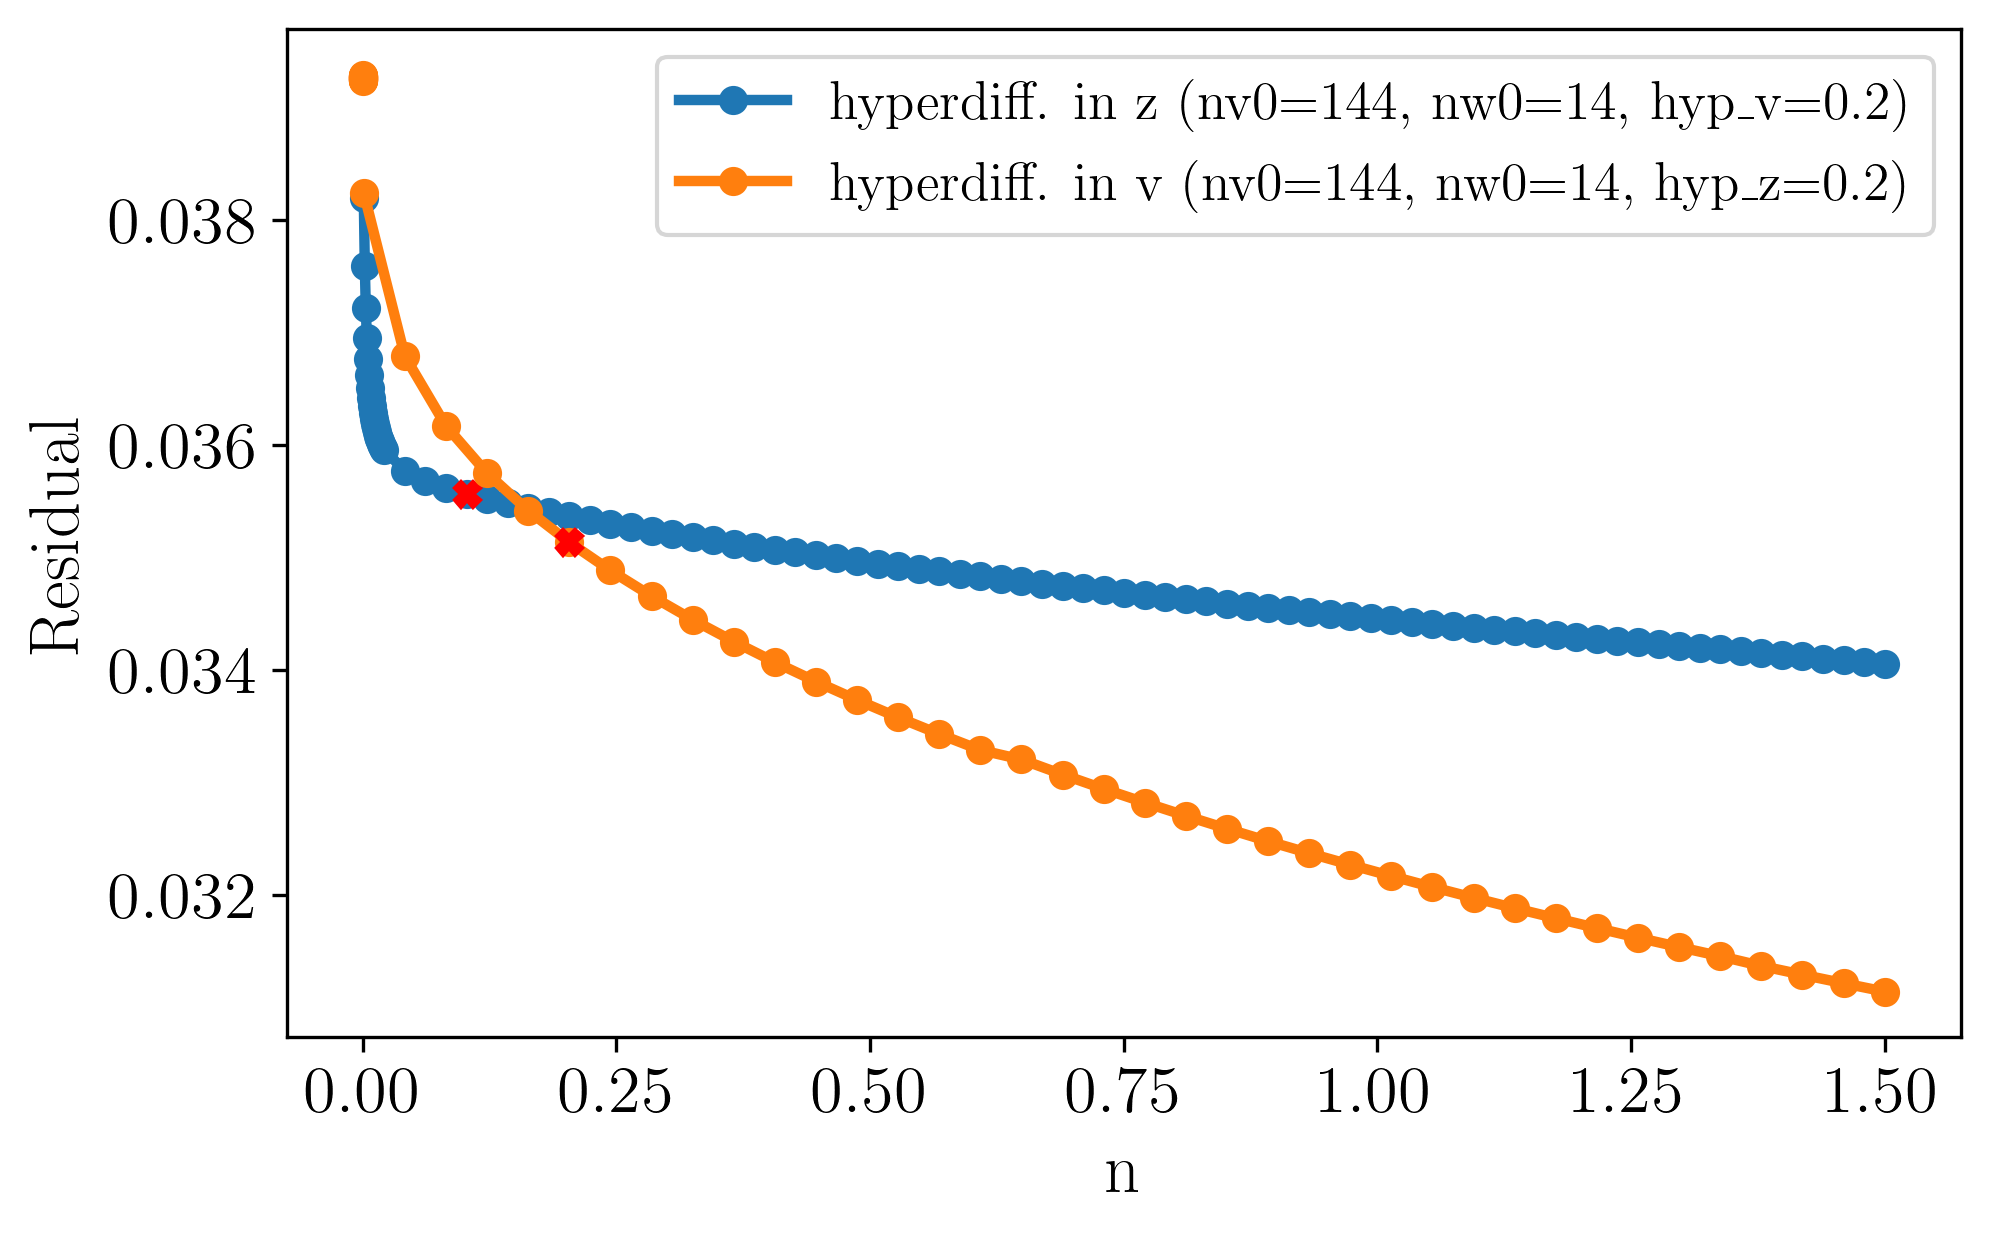

In [82]:
plt.figure()
plt.plot(scan_hz[1:], res_hz[1:], '-o', label=r"hyperdiff. in  z (nv0=144, nw0=14, hyp\_v=0.2)")
plt.plot(scan_hz2, res_hz2, '-o', color="C0")
plt.plot(scan_hz[5], res_hz[5], 'rX')
plt.plot(scan_hv, res_hv, '-o', label=r"hyperdiff. in  v (nv0=144, nw0=14, hyp\_z=0.2)")
plt.plot(scan_hv2, res_hv2, '-o', color="C1")
plt.plot(scan_hv[5], res_hv[5], 'rX')
plt.xlabel(r"n")
plt.ylabel(r"Residual")
# plt.xlim(xmax=0.25)
plt.legend()
plt.show()

/raven/u/cmor/jupyter/HP_project/data/LHD/surface


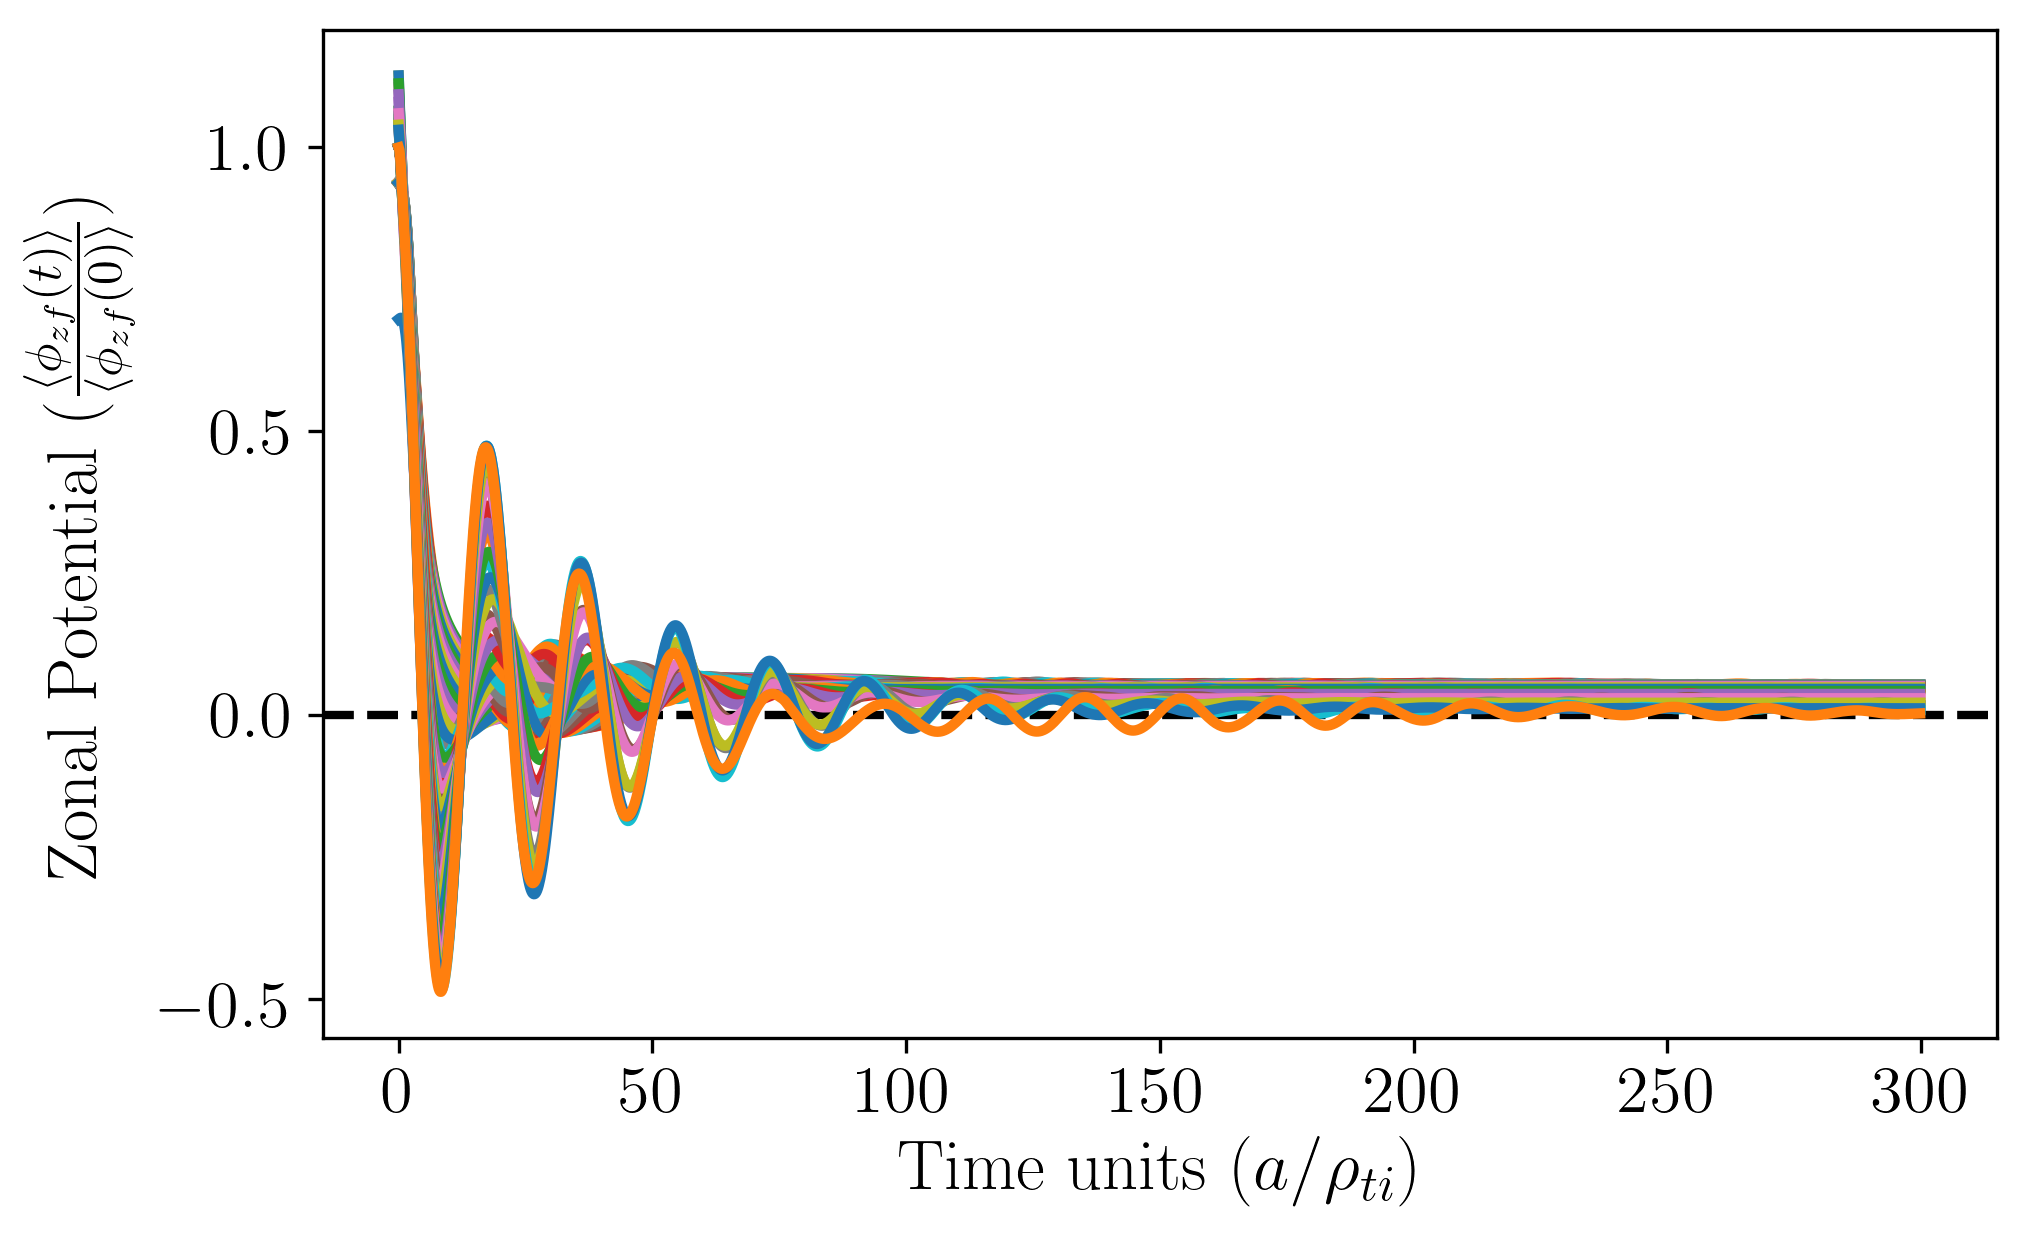

In [103]:
%cd /u/cmor/jupyter/HP_project/data/LHD/surface
t0 = 0
tf = 2000
scan = [0.030, 0.060, 0.090, 0.120, 0.150, 0.180, 0.210, 0.240, 0.270, 0.300,
        0.330, 0.360, 0.390, 0.420, 0.450, 0.480, 0.510, 0.540, 0.570, 0.600,
        0.630, 0.660, 0.690, 0.720, 0.750, 0.780, 0.810, 0.840, 0.870, 0.900,  0.930]

all_x, all_r, all_a, all_e = convergence_fitter(plot='plot')
sca = []
res = []
for kek in range(0, len(scan)):
    sca = np.append(sca, scan[kek] * np.sqrt(2))
    res = np.append(res, all_a[kek])  #  * np.sqrt(2))

In [104]:
E_e_fit = [[0.034524, 0.12738, 0.21905, 0.31071, 0.40238, 0.49643, 0.58929, 0.68095, 0.77500, 0.86667], [0.0025698, 0.015866, 0.034302, 0.046816, 0.052737, 0.056648, 0.056648, 0.057765, 0.056425, 0.057654]]
E_l_fit = [[0.034524, 0.12500, 0.22024, 0.31190, 0.40357, 0.49643, 0.58810, 0.67976, 0.77500, 0.86667], [0.0011173, 0.016089, 0.034190, 0.046145, 0.052291, 0.055978, 0.056089, 0.056872, 0.055754, 0.057095]]

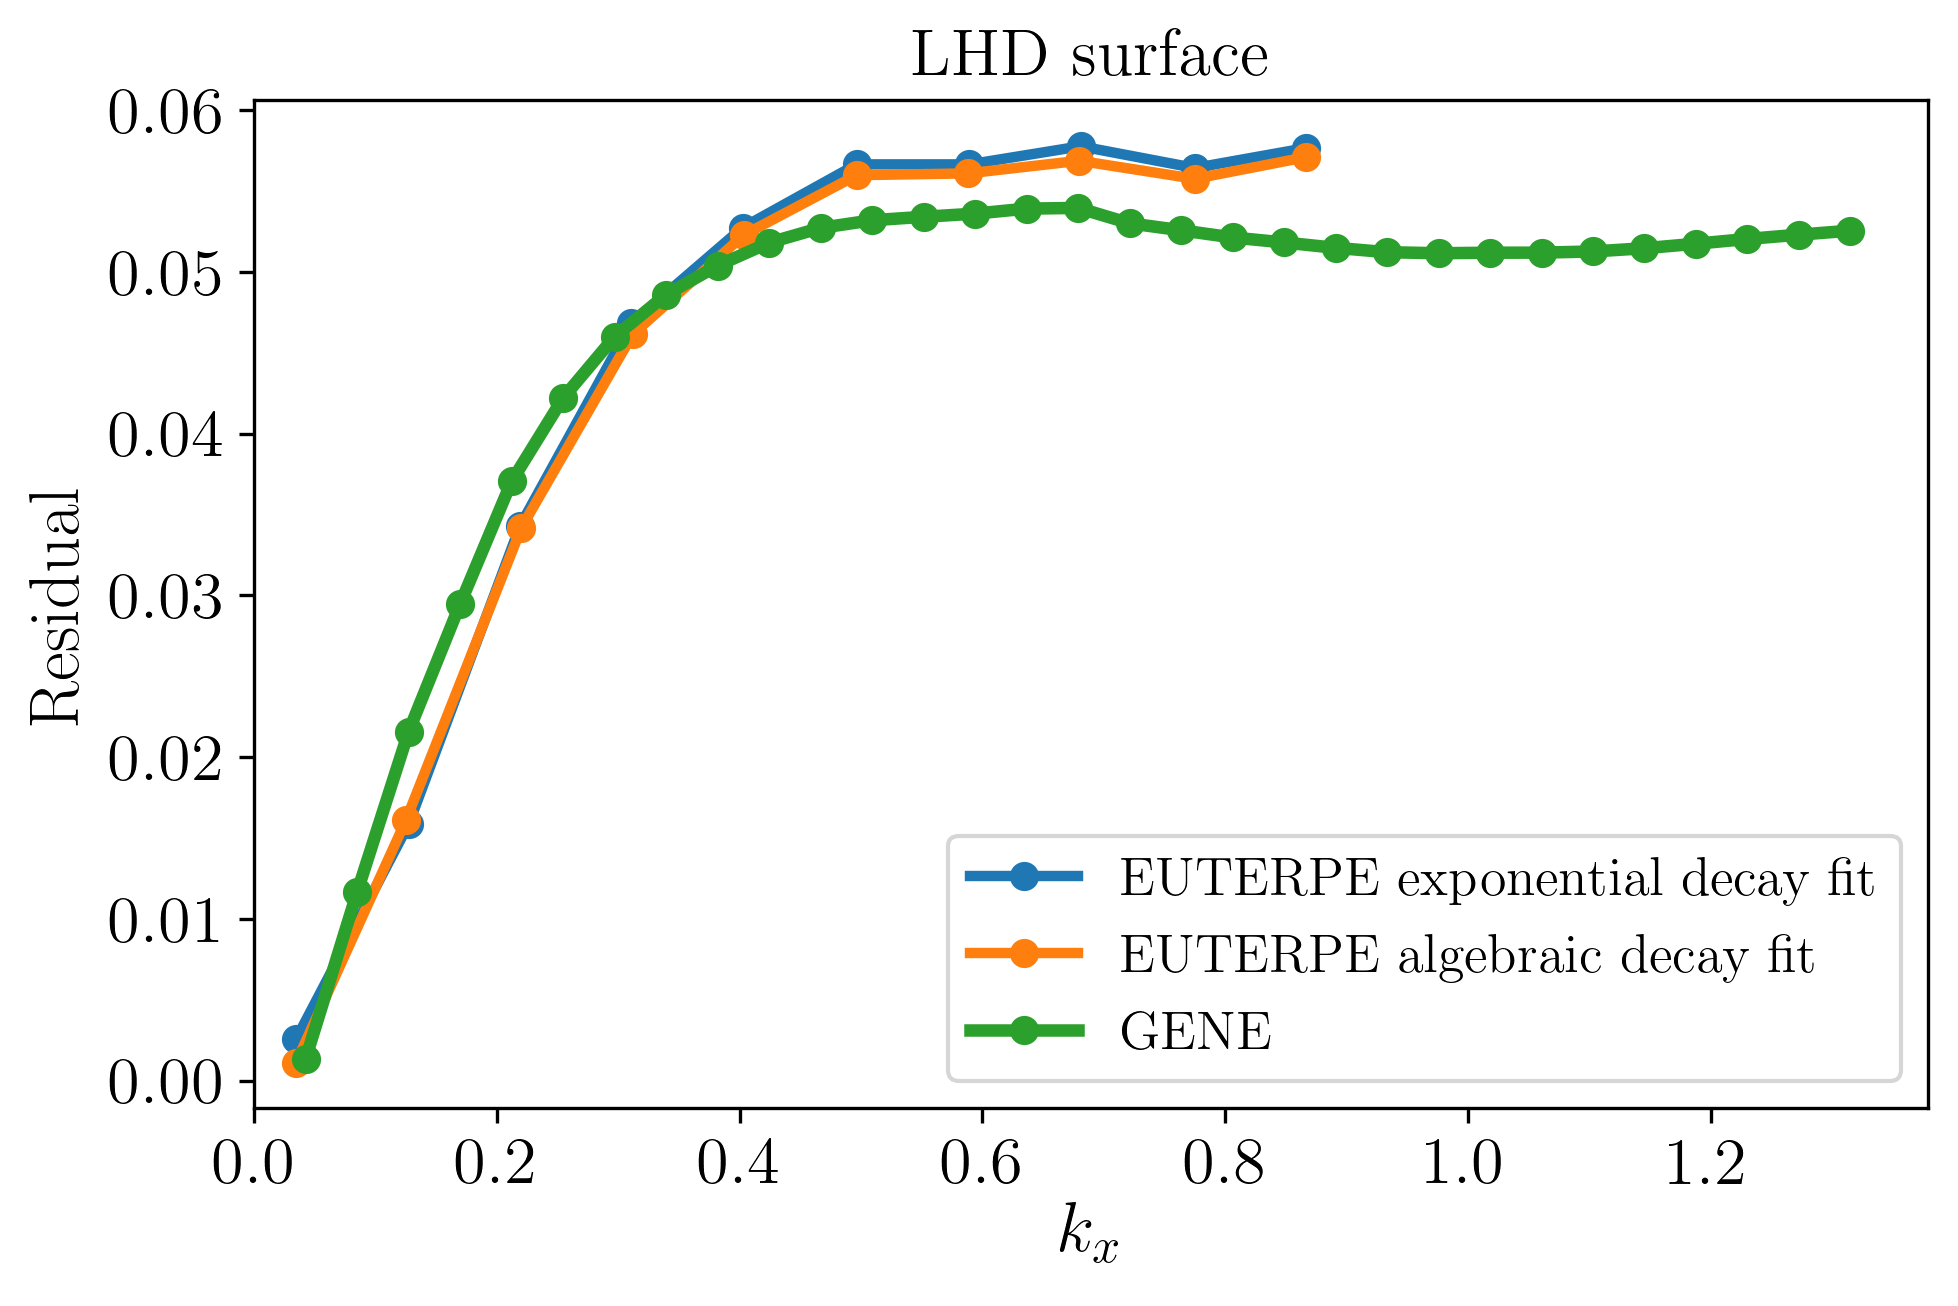

In [105]:
plt.figure()
plt.title(r"LHD surface ")
plt.plot(E_e_fit[0], E_e_fit[1], '-o', label=r"EUTERPE exponential decay fit")
plt.plot(E_l_fit[0], E_l_fit[1], '-o', label=r"EUTERPE algebraic decay fit")
plt.plot(sca, res, '-o', label=r"GENE", linewidth=3)
plt.xlabel(r"$k_{x}$")
plt.ylabel(r"Residual")
plt.xlim(xmin=0)
# plt.ylim(ymin=0)
plt.legend()
plt.savefig("/u/cmor/jupyter/HP_project/figures/lhd_surface_residual_gene-euterpe.png")
plt.show()

In [106]:
gam = pylab.loadtxt("timetraceions_0020.dat")

E = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]), where=gam[0, 1] != 0)

t = gam[:, 0]  # Time

## LHD_surf_0026
a = 0.05126107
b = 0.13020194
c = 0.01299829
d = 9.83095429
e = 0.03139539
g = 3.11837672
k = 0.01949793
m = 0.76578451

r2 = []
res = []
tstep = []

for kekke in range(20, len(t), 10):

    y = E[:kekke]
    p = t[:kekke]

    gmodel = lmfit.Model(edi_2)

    pars = Parameters()
    pars.add('a', value=a)  # Residual
    pars.add('b', value=b)
    pars.add('c', value=c)
    pars.add('d', value=d)
    pars.add('e', value=e)  # decay
    pars.add('g', value=g)
    pars.add('k', value=k)
    pars.add('m', value=m)
    result = gmodel.fit(y, pars, t=p, nan_policy='propagate')
    r2 = np.append(r2, 1 - result.residual.var() / np.var(y))
    res = np.append(res, result.best_values.get("a"))
    tstep = np.append(tstep, p[-1])

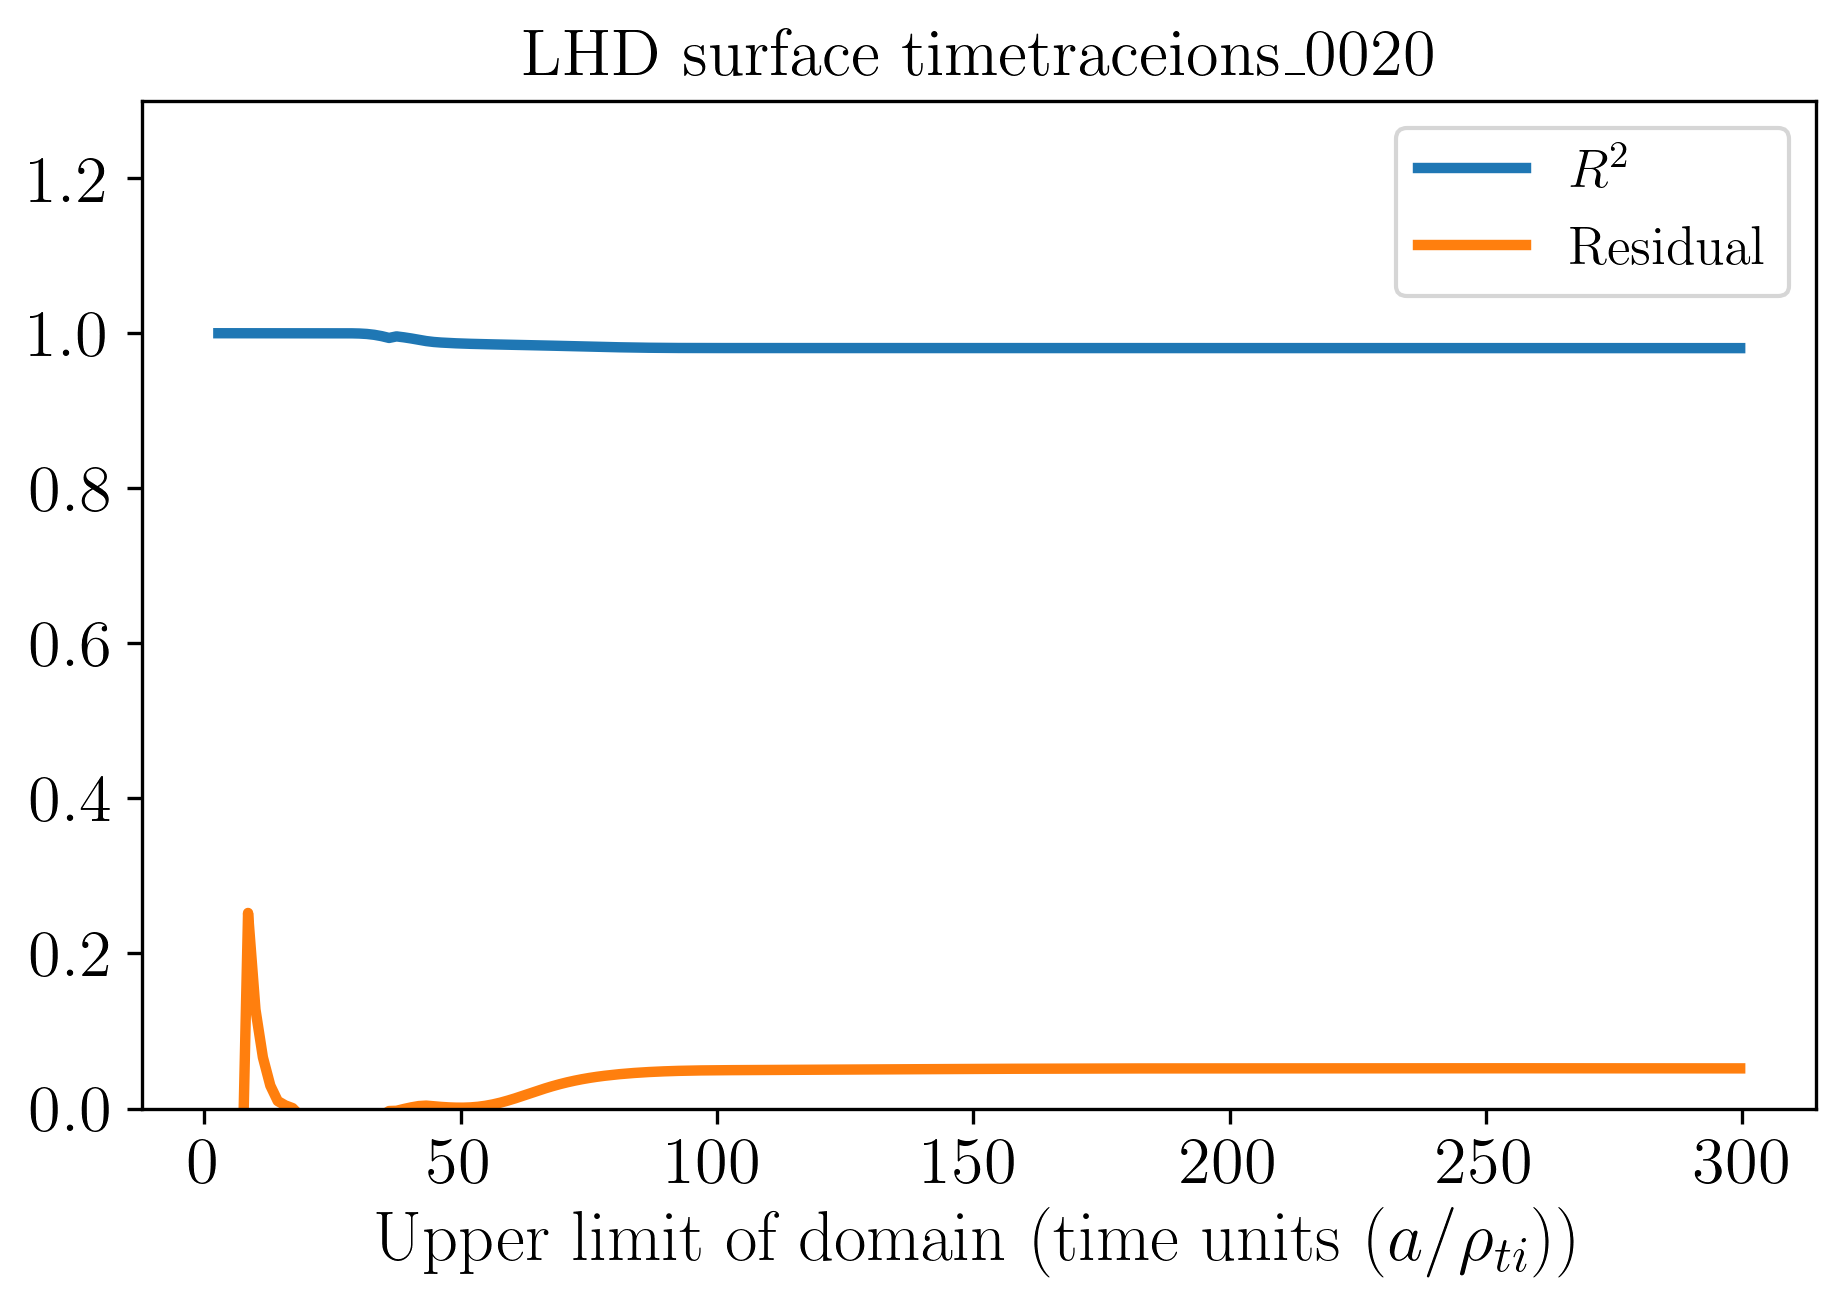

0.05181923517050253
0.04939092352526699
0.05104702094041881


In [107]:
lhd_s_20_tstep = tstep
lhd_s_20_r2 = r2
lhd_s_20_res = res
plt.plot(lhd_s_20_tstep, lhd_s_20_r2, label=r"$R^{2}$")
plt.plot(lhd_s_20_tstep, lhd_s_20_res, label=r"Residual")
plt.ylim(ymin=-0, ymax=1.3)
# plt.xlim(xmin=0)
plt.title(r"LHD surface timetraceions\_0020")
plt.xlabel(r"Upper limit of domain (time units $(a/\rho_{ti})$)")
# plt.ylabel(r"$R^{2}$")
plt.legend()
plt.show()
id300 = (np.abs(lhd_s_20_tstep - 300)).argmin()
id2000 = (np.abs(lhd_s_20_tstep - 100)).argmin()
print(lhd_s_20_res[id300])
print(lhd_s_20_res[id2000])
print(y[-1])